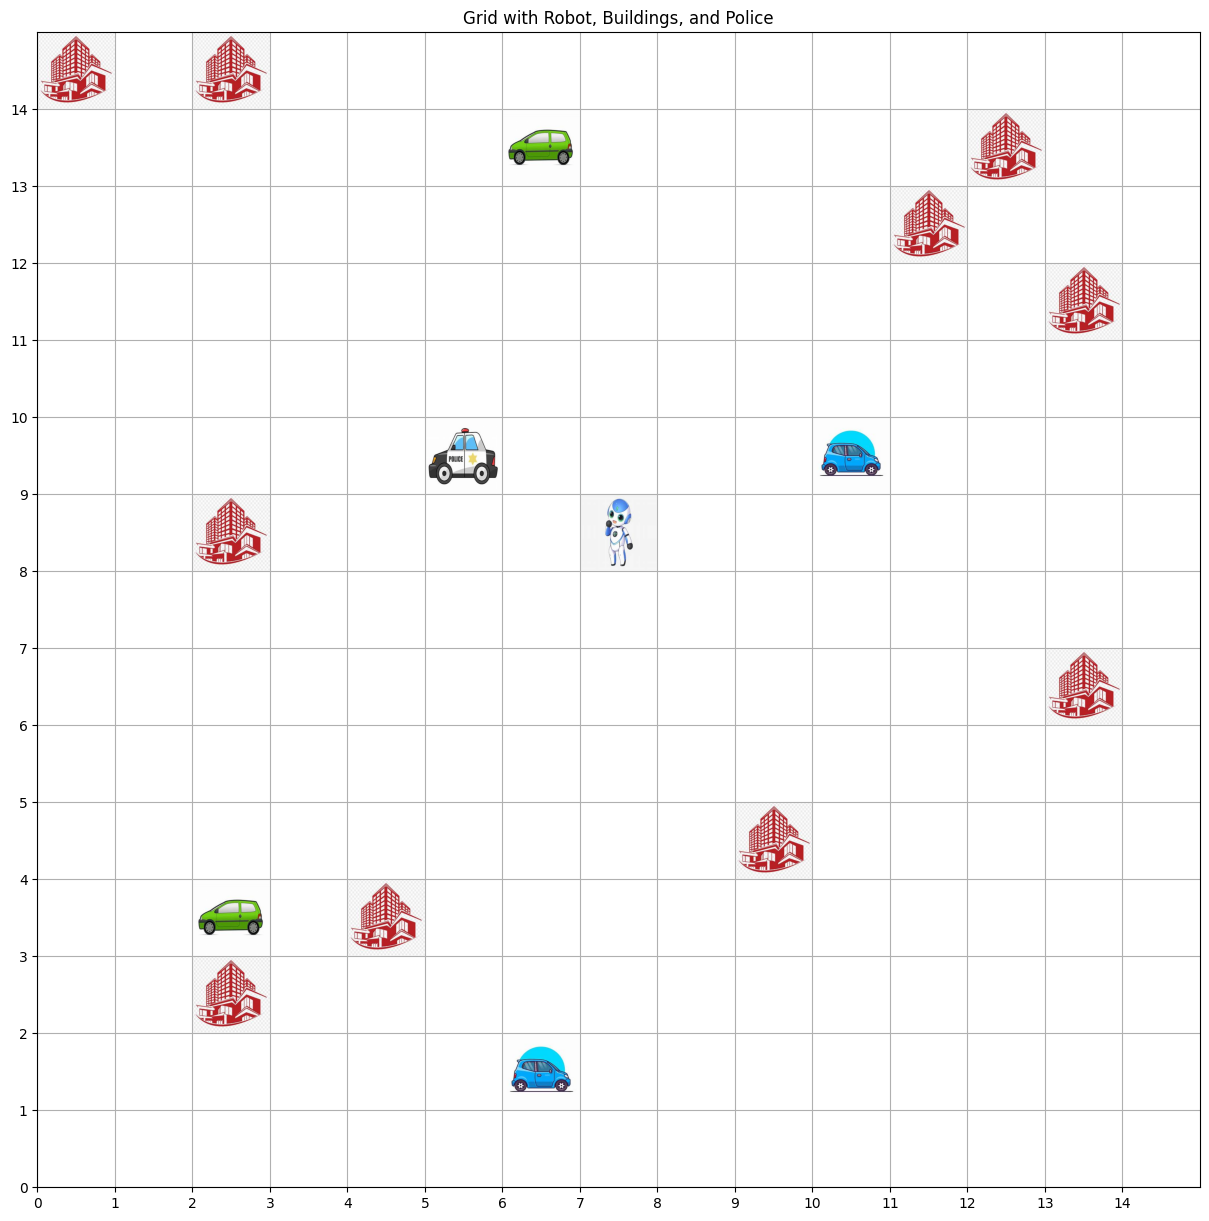

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random

def plot_grid_with_robot_and_buildings(robot_image_path, building_image_path, police_image_path, car1_image_path, car2_image_path, grid_size=(15, 15), num_buildings=10):
    fig, ax = plt.subplots(figsize=(grid_size[0], grid_size[1]))
    ax.set_title("Grid with Robot, Buildings, and Police")
    ax.set_xticks(np.arange(0, grid_size[0], 1))
    ax.set_yticks(np.arange(0, grid_size[1], 1))
    ax.grid(True)
    
    # Generate random locations for buildings
    building_locations = [(random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1)) for _ in range(num_buildings)]

    # Generate random location for robot
    robot_location = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))
    while robot_location in building_locations:
        robot_location = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))

    # Generate random location for police
    police_location = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))
    while police_location in building_locations or police_location == robot_location:
        police_location = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))

    # Generate random locations for car1
    car1_locations = [(random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1)) for _ in range(2)]

    # Generate random locations for car2
    car2_locations = [(random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1)) for _ in range(2)]

    # Ensure car2 locations are unique and not in building_locations, robot_location, or car1_locations
    while any(location in building_locations or location == robot_location or location in car1_locations for location in car2_locations):
        car2_locations = [(random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1)) for _ in range(2)]

    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if (i, j) in building_locations:
                image = Image.open(building_image_path)
                ax.imshow(image, extent=[j, j + 1, i, i + 1], aspect='auto', zorder=1)
            elif (i, j) == robot_location:
                image = Image.open(robot_image_path)
                ax.imshow(image, extent=[j, j + 1, i, i + 1], aspect='auto', zorder=1)
            elif (i, j) == police_location:
                image = Image.open(police_image_path)
                ax.imshow(image, extent=[j, j + 1, i, i + 1], aspect='auto', zorder=1)
            elif (i, j) in car1_locations:
                image = Image.open(car1_image_path)
                ax.imshow(image, extent=[j, j + 1, i, i + 1], aspect='auto', zorder=1)
            elif (i, j) in car2_locations:
                image = Image.open(car2_image_path)
                ax.imshow(image, extent=[j, j + 1, i, i + 1], aspect='auto', zorder=1)
            else:
                ax.add_patch(plt.Rectangle((j, i), 1, 1, color='white', zorder=0))

    plt.gca().invert_yaxis()  # Invert y-axis to match grid orientation
    plt.xlim(0, grid_size[0])  # Set x-axis limit
    plt.ylim(0, grid_size[1])  # Set y-axis limit
    plt.show()

# Example usage:
plot_grid_with_robot_and_buildings("robot.jpg", "building_logo.jpg", "police.jpg", "car1.jpg", "car2.jpg")
